# General

We will be exploring the Border Crossing/Entry dataset from the United States Department of Transportation. This data is maintained by the Bureau of Transporation Statistics that includes data representing inbound crossings at the U.S.-Canada and the U.S.-Mexico border at the port level. 

The data reflects the number of vehicles, containers, passengers or pedestrians entering the United States on a monthly basis. Along with port level information this dataset includes intriguing information around what are referred to as 'measures' that can be classified as 'commercial' and 'personal' border crossings/entry that we will explore further.

The dataset itself consists of 1 table. We will not be utilizing all fields that are provided in the dataset but could be used for future research purposes.

The Border Crossings/Entry file contains a Port Name, State, Port Code,	Border,	Measure, Value, and a Date as a record.

There are only 2 challenges that were encountered (so far) for this dataset. The first challenge is values in the Date field are formatted at datetime values but the dataset is only recording aggregated values at a Year-Month level of granularity. The second is regarding the date we are (currently) running this analysis and how that may skew our dataset. 


**BTS = "Bureau of Transportation Statistics"**

## Quality
As this dataset is being maintained by the federal government we are not as concerned as we would be with other public datasets from across the web. 
### [US Border-Crossing/Entry Data](https://www.bts.gov/content/border-crossingentry-data)

## Asking and Answering 3 Analytical Questions

__#1 How have border crossings trended over the past 2 decades? 

_Note: Keep in mind that this dataset only includes crossings INTO the US not outbound from the US._

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sci_stats
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

# cleaning up dates format for visuals in matplotlib
# https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates



In [2]:
# Opening the file and creating a dataframe of it

df = pd.read_csv('Border_Crossing_Entry_Data.csv')

# Converting the original Date column that was type 'string' to type 'Datetime'
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for Year values from 'Dates' column for use in visualizations
df['Year'] = df['Date'].dt.year

annual_df = df[['Year', 'Value']]
annual_df = df.groupby(['Year'])['Value'].sum().reset_index()

In [3]:
df.head(20)

,Port Name,State,Port Code,Border,Date,Measure,Value,Year
0,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Truck Containers Full,142,2019
1,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Trucks,675,2019
2,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Truck Containers Empty,542,2019
3,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Personal Vehicles,10850,2019
4,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Personal Vehicle Passengers,28016,2019
5,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Pedestrians,32,2019
6,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Buses,47,2019
7,Alcan,Alaska,3104,US-Canada Border,2019-06-01,Bus Passengers,1047,2019
8,Alcan,Alaska,3104,US-Canada Border,2019-05-01,Trucks,774,2019
9,Alcan,Alaska,3104,US-Canada Border,2019-05-01,Truck Containers Full,152,2019


We will be analyzing the past 2 decades of border crossings on an annual basis to get a high level view of any trends we can dive into.

411094543


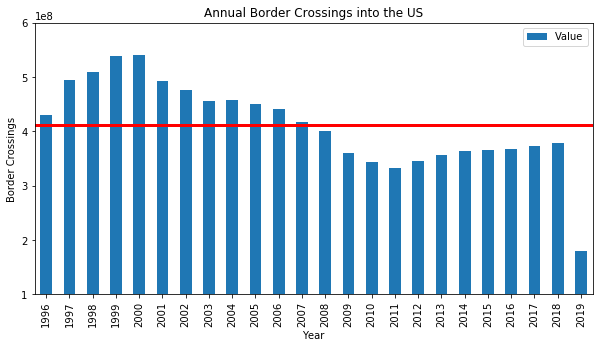

411788531


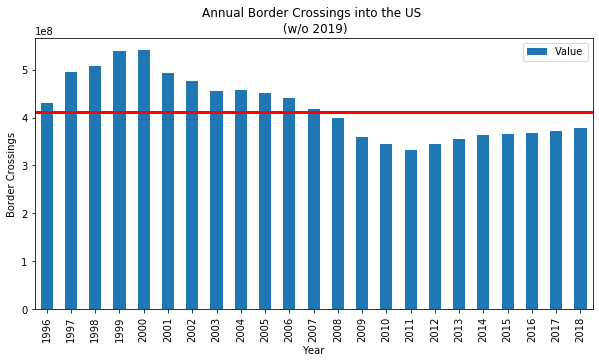

In [4]:
# Calculate Statistics
# Mean
annual_mean = int(np.mean(annual_df['Value']))

print(annual_mean)

annual_df.plot('Year','Value', kind='bar', figsize=(10,5))
hline = plt.axhline(y=annual_mean, linewidth=3, color='r')
plt.title('Annual Border Crossings into the US')
plt.ylabel('Border Crossings')
plt.ylim(100000000, 600000000)
plt.Normalize()
plt.show()

# remove year '2019'
annual_df = annual_df[0:-1]

# Mean w/o '2019'
annual_mean_wo2019 = int(stats.harmonic_mean(annual_df['Value']))

print(annual_mean_wo2019)

annual_df.plot('Year','Value', kind='bar', figsize=(10,5))
hline = plt.axhline(y=annual_mean_wo2019, linewidth=3, color='r')
plt.title('Annual Border Crossings into the US \n (w/o 2019)')
plt.ylabel('Border Crossings')
plt.show()

Just from a visual analysis of annual border crossings we can see that 2019 is an anomaly. That is due to this analysis is being done in September of 2019 and the dataset gets updated at the end of every quarter. This means we only have data up to June of 2019 (only half of the year). For this reason we chose to remove 2019 so as to not skew any of the analysis.

You can also see the change to the average amount of border crossings increases once we remove the incomplete 2019 year. 

_**After the year 2000 there seems to be decline in border crossings into the US. Let's explore this further.**_

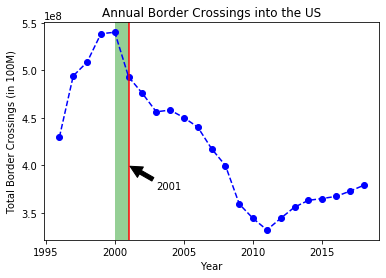

In [5]:
# Visualizing annual border crossings compared to the annual mean
plt.plot(annual_df['Year'], annual_df['Value'], 'bo--')
plt.title('Annual Border Crossings into the US')
plt.xlabel('Year')
plt.ylabel('Total Border Crossings (in 100M)')
plt.axvline(x=2001, color='r')
plt.annotate('2001', xy=(2001, 400000000), xytext=(2003, 375000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvspan(2000, 2001, facecolor='#2ca02c', alpha=0.5)
plt.show()

It looks like there was an event that triggered a stark decline starting in 2001. Then continued until another event on or around 2012 ocurred that has increased our land border entries into the US since.

_**Note: After doing a bit of research into world and US specific events in 2001 the Septemper 11 terrorist attack on the World Trade Center was something that could have impacted entries into the US.**_

__#2 Has the decline since 2001 impacted commercial border crossings?

The `Measure` variable can be thought of as _Modes of Transportation_ for which we can group our commercial transportation types into.

The BTS classifies a _commercial_ border crossing as either:
- Truck container crossings (loaded and unloaded)
- Rail container crossings (loaded and unloaded)

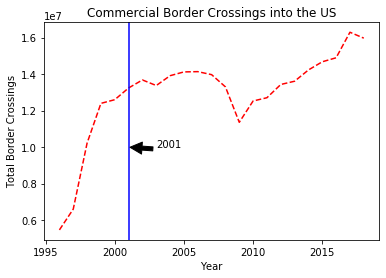

In [6]:
# remove year '2019'
df = df[df['Year']!= 2019]

border_df = df[['Year', 'Measure', 'Value']]
border_df = border_df.groupby(['Year', 'Measure'])['Value'].sum().reset_index()

border_df['Commercial'] = 0
border_df.loc[border_df['Measure'].str.contains('Containers', na=False), 'Commercial'] = 1

commercial_df = border_df[border_df['Commercial']==1]
commercial_df = commercial_df.groupby(['Year','Commercial'])['Value'].sum().reset_index()

cdf_x = commercial_df['Year']
cdf_y = commercial_df['Value']

plt.plot(cdf_x, cdf_y, 'r--')
plt.title('Commercial Border Crossings into the US')
plt.xlabel('Year')
plt.ylabel('Total Border Crossings')
plt.axvline(x=2001, color='b')
plt.annotate('2001', xy=(2001, 10000000), xytext=(2003, 10000000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

This looks as though the commercial category of land border crossings were not impacted by the 2001 event we saw have an impact of our overall border crossings into the US by land. So... what did? Well let's take a look at the _personal_ category of border crossings. 

__#3 Has personal travel to the US by Land seen a decline since 2001?

The `Measure` variable can be thought of as _Modes of Transportation_ for which we can group our personal transportation types into.

The BTS classifies a _personal_ border crossing as any of:
- Truck crossings
- Train crossings
- Passengers crossing in trains
- Bus crossings
- Passengers crossing in buses
- Privately owned vehicle crossings
- Passengers crossings in privately owned vehicles
- Pedestrian crossings

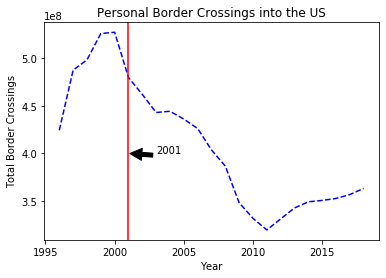

In [7]:
personal_df = border_df[border_df['Commercial']==0]
personal_df = personal_df.groupby(['Year','Commercial'])['Value'].sum().reset_index()

pdf_x = personal_df['Year']
pdf_y = personal_df['Value']
plt.plot(pdf_x, pdf_y, 'b--')
plt.title('Personal Border Crossings into the US')
plt.xlabel('Year')
plt.ylabel('Total Border Crossings')
plt.axvline(x=2001, color='r')
plt.annotate('2001', xy=(2001, 400000000), xytext=(2003, 400000000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

So from our analysis we can see that Tourism (defined as 'Personal' modes of Transportation) contributes the majority to the decline in travel to the US from Mexico and Canada. The 'Commercial' industry comprised of Trucks and Railroads entering the US has been gaining momentum which contradicts our general declining trend of Personal travel.

# Future Research and Analysis Improvements

    ○ By including more terrorist attack examples to increase the probability that these fluctuations in the dataset were not due to other variables.
    
    ○ Include Air and Maritime data in the trade analysis would solidify this analysis as this is only one type of entry into the US and the other ones could provide the ability to perform an international analysis (possibly by country into the US)
    
    ○ Adding more years (even back to the 80's) could provide a higher confidence level in calculating our central tendency measures. 
    
    ○ Create an API call to the BTS.gov website could pull data up to todays date for the consumer of the analysis. 

# Capstone 2

After the BTS presented their findings that *commercial entries* into the US have been generally increasing over the past 2 decades to the President they are asked to test out a theory he has. The President wants to increase this positive trend and would like the BTS to dedicate a port to strictly *commercial entries only*. By dedicating a port to only one type of entry he believes this will expedite vehicle processing times thus increasing the total amount of entries for commercial use. 

This could be an indicator of growth in the US Economy; Reduce traffic congestion at the ports; Improve International relations with Mexico and Canada.

**Presidential Hypothesis**: Having a Port dedicated to Commercial transportation will increase border entries.

**Implementation of the test**: To implement the test the BTS will need to allocate atleast a month of lead time to communicate to the states that will be implementing this test. The optional extension period designated for this test will provide flexibility in the scenario that personal vehicle drivers do not see the communications sent out by the BTS before trying to enter a port that is designated to be strictly a *commercial entry* port. This could actually lower the initial entries within the first month which could skew the tests results. The BTS has also confirmed that there are no other tests being run on any of the ports or in the states that were chosen for this test.

Once communications have been propagated the test can then be run. To set the stage for this test the BTS has chosen to pick 2 ports (1 from the US-Canada border and 1 from the US-Mexico border). These 2 ports will be completely dedicated to only *commercial entries*. The 2 chosen ports will be flagged in the BTS dataset under a field **"Test Port"** that will be used to generate our test data. The BTS will run the test over a 3 month period with the option to extend to 6 months if the initial results do not provide an acceptable significance level. 

**elaborate on the samples you are using in your test**

**Definition of Success**: If the test concludes that dedicating ports exclusively to *commercial entries* increases total entries on average with a significance level (p-value) of atleast 0.05 from the state's mean prior to running the test we will implement a rollout plan to dedicate atleast 1 port to *commercial entries* per state. If the test does not conclude with a significance level (p-value) of atleast 0.05 we will run the test for another 3 months.


Classifying Commercial and Personal Entry Totals:

In [8]:
# Create Commercial Column to Classify Transportation Types
df['Commercial'] = 0

df.loc[df['Measure'].str.contains('Containers', na=False), 'Commercial'] = 1

# Sum Commercial Totals
df['Comm_Total'] = 0
df.loc[df['Commercial'] == 1, 'Comm_Total'] = df.Value

# Sum Personal Totals
df['Pers_Total'] = 0
df.loc[df['Commercial'] == 0, 'Pers_Total'] = df.Value

df['State (Border)'] = df.State + " ("+  df.Border.str.slice(start=3, stop=9)+ ")"


df.head(10)

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Commercial,Comm_Total,Pers_Total,State (Border)
39,Alcan,Alaska,3104,US-Canada Border,2018-12-01,Truck Containers Empty,422,2018,1,422,0,Alaska (Canada)
40,Alcan,Alaska,3104,US-Canada Border,2018-12-01,Personal Vehicle Passengers,2132,2018,0,0,2132,Alaska (Canada)
41,Alcan,Alaska,3104,US-Canada Border,2018-12-01,Personal Vehicles,830,2018,0,0,830,Alaska (Canada)
42,Alcan,Alaska,3104,US-Canada Border,2018-12-01,Trucks,486,2018,0,0,486,Alaska (Canada)
43,Alcan,Alaska,3104,US-Canada Border,2018-12-01,Truck Containers Full,65,2018,1,65,0,Alaska (Canada)
44,Alcan,Alaska,3104,US-Canada Border,2018-11-01,Personal Vehicle Passengers,2495,2018,0,0,2495,Alaska (Canada)
45,Alcan,Alaska,3104,US-Canada Border,2018-11-01,Truck Containers Empty,384,2018,1,384,0,Alaska (Canada)
46,Alcan,Alaska,3104,US-Canada Border,2018-11-01,Personal Vehicles,1107,2018,0,0,1107,Alaska (Canada)
47,Alcan,Alaska,3104,US-Canada Border,2018-11-01,Pedestrians,11,2018,0,0,11,Alaska (Canada)
48,Alcan,Alaska,3104,US-Canada Border,2018-11-01,Trucks,470,2018,0,0,470,Alaska (Canada)


Identify which states to choose ports from both the US-Mexico and US-Canada Borders to reduce possible selection bias:

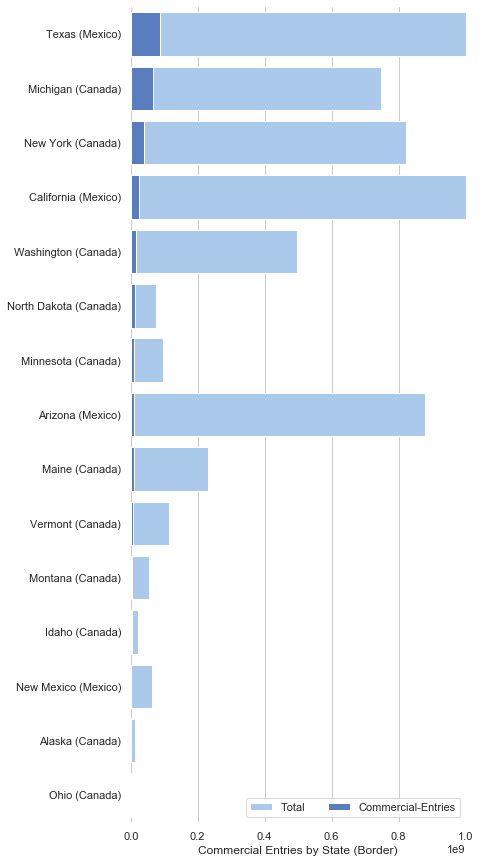

In [9]:
# Load the dataset
# cap2 = df.groupby(["Port Name"])['Value','Comm_Total'].sum().reset_index()

cap2 = df.groupby(["State (Border)"])['Value','Comm_Total','Pers_Total'].sum().reset_index()

# cap2['State (Border)'] = cap2.State + " ("+  cap2.Border.str.slice(start=3, stop=9)+ ")"
# cap2.loc[cap2.State != 'null', 'Border + State'] = "{} ({})".format(cap2.Border, cap2.State)

cap2 = cap2.sort_values("Comm_Total", ascending=False)


sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plotting the total Entries
sns.set_color_codes("pastel")
sns.barplot(x="Value", y="State (Border)", data=cap2,
            label="Total", color="b")

# Plotting the Commercial Entries Per State
sns.set_color_codes("muted")
sns.barplot(x="Comm_Total", y="State (Border)", data=cap2,
            label="Commercial-Entries", color="b")

# Add a legend and informative axis label
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000000000), ylabel="",
       xlabel="Commercial Entries by State (Border)")
sns.despine(left=True, bottom=True)

After finding that there is a large amount of variance of commercial entries by state the BTS decides to take a closer look at the top states for each border **(Michigan for Canada and Texas for Mexico respectively)** to find ports to which they can run this test on. 

In [10]:
# Filter dataset to only include Texas and Michigan records
test_df = df[((df.State == 'Texas') | (df.State == 'Michigan'))]
test_df = test_df[['Port Name', 'State', 'Date', 'Value', 'Commercial', 'Comm_Total', 'Pers_Total']]
test_df['Month'] = test_df['Date'].dt.month
test_df['Port (State)'] = test_df['Port Name'] + " ("+  test_df.State + ")"

# test_df.head(5)

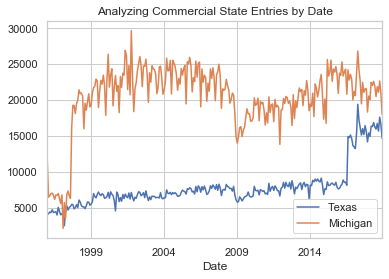

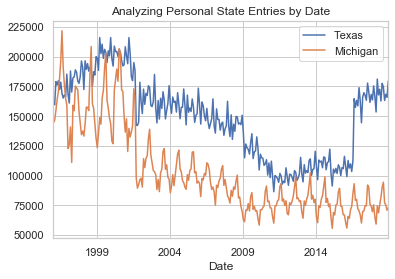

In [11]:
# Port data for each state
# Plot Commercial Entry Trends for both states
fig = test_df[(test_df.State == 'Texas') & (test_df.Commercial ==1)][['Date','Comm_Total']].groupby('Date').mean().plot()
test_df[(test_df.State == 'Michigan') & (test_df.Commercial ==1)][['Date','Comm_Total']].groupby('Date').mean().plot(ax=fig)
plt.legend(['Texas','Michigan'])
plt.title('Analyzing Commercial State Entries by Date')
plt.show()

# Plot Personal Entry Trend for both states
fig2 = test_df[(test_df.State == 'Texas') & (test_df.Commercial ==0)][['Date','Pers_Total']].groupby('Date').mean().plot()
test_df[(test_df.State == 'Michigan') & (test_df.Commercial ==0)][['Date','Pers_Total']].groupby('Date').mean().plot(ax=fig2)
plt.legend(['Texas','Michigan'])
plt.title('Analyzing Personal State Entries by Date')
plt.show()

Identify which Port the BTS will use for each Border:

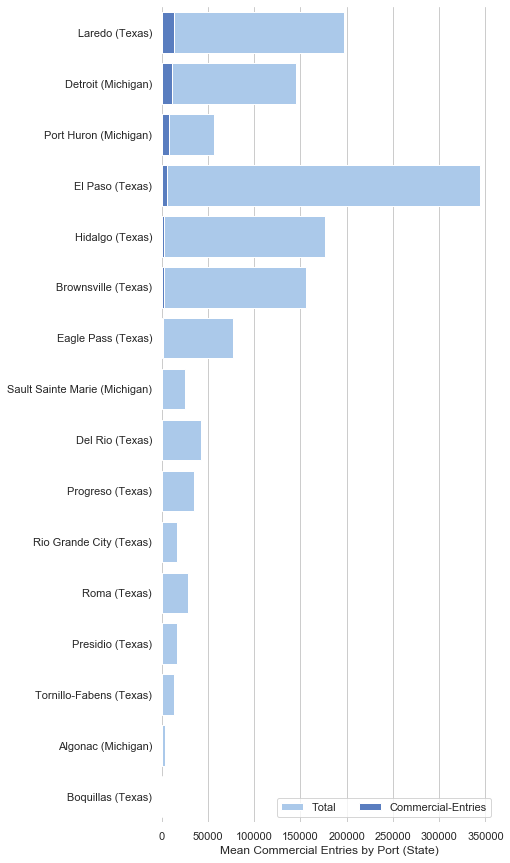

In [12]:
# Mean Performance by Month for each Port


# Load dataset
# Calculating the mean monthly entries for each port

port_df = test_df[((test_df.State == 'Texas') | (test_df.State == 'Michigan'))][['Port (State)','Comm_Total', 'Value']].groupby('Port (State)').mean().reset_index()

port_df = port_df.sort_values("Comm_Total", ascending=False)

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plotting the total Entries
sns.set_color_codes("pastel")
sns.barplot(x="Value", y="Port (State)", data=port_df,
            label="Total", color="b")

# Plotting the Commercial Entries Per State
sns.set_color_codes("muted")
sns.barplot(x="Comm_Total", y="Port (State)", data=port_df,
            label="Commercial-Entries", color="b")

# Add a legend and informative axis label
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Mean Commercial Entries by Port (State)")
sns.despine(left=True, bottom=True)

From this analysis the BTS saw that **Lareda (Texas)** and **Detroit (Michigan)** had the highest opportunities to succeed since they handle the highest levels of *commercial entries* on average per month so these were chosen to be the ports used for the test.

After choosing the Ports to run the experiment with, BTS needs to identify what 3 months during the year they should run this experiment on.

In [13]:
# Which months should the experiment be run on
test_df.groupby('Month')['Comm_Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,3804.0,3240.989485,12410.713368,0.0,0.0,0.0,0.0,131263.0
2,3804.0,3185.935857,12309.177511,0.0,0.0,0.0,0.0,136953.0
3,3804.0,3545.949001,13736.595979,0.0,0.0,0.0,0.0,149619.0
4,3803.0,3483.335262,13276.377724,0.0,0.0,0.0,0.0,146336.0
5,3803.0,3570.275835,13582.154843,0.0,0.0,0.0,0.0,147117.0
6,3802.0,3512.638874,13652.392682,0.0,0.0,0.0,0.0,156441.0
7,3801.0,3273.911865,12269.351808,0.0,0.0,0.0,0.0,140866.0
8,3748.0,3566.931964,13607.419879,0.0,0.0,0.0,0.0,151754.0
9,3748.0,3487.742263,13380.589509,0.0,0.0,0.0,0.0,136834.0


# Experiment Configuration

The BTS decides to run the experiment in the first quarter due to it having the lowest *3 month average standard deviation* (~12,819) which they believe will improve the efficacy of the experiment.

Quarter 1 of 2018 will be used as the experiments Test which includes January, February, and March calendar months (no fiscal months will be used for this experiment). The control will use Quarter 1 which includes January, February, and March calendar months. On January 1st 2018 **Lareda (Texas)** and **Detroit (Michigan)** will be dedicated to strictly *commercial entries* until March 31st 2018. Once the experiment has completed the BTS will evaluate if it needs to be run another 3-months based on the results.

## 3 Months into the experiment

3 Months into the experiment the BTS has collected enough data to evaluate the results. For each state below:

## TEXAS

In [24]:
# 3 months from 2018 as the Test
# Control sample could be 3 months from past years (YOY)

texas_df = test_df[test_df.State == 'Texas']


#Size of Groups
print('test sample size:', len(texas_df[(texas_df.Commercial == 1) & (texas_df.Date >'2017-12-01') & (texas_df.Month < 4)]))
print('control sample size:', len(texas_df[(texas_df.Commercial == 1) & (texas_df.Date < '2018-01-01') & (texas_df.Month < 4)]))
print('test average:', texas_df.Comm_Total.mean())
print()
# What is the commercial entry average of test and control?
print('test entry average:', texas_df[(texas_df.Commercial == 1) & (texas_df.Date >'2017-12-01') & (texas_df.Month < 4)].Comm_Total.mean())
print('control average:', texas_df[(texas_df.Commercial == 1) & (texas_df.Date < '2018-01-01') & (texas_df.Month < 4)].Comm_Total.mean())
# Are the test and control groups significantly different?
sci_stats.ttest_ind(texas_df[(texas_df.Date >'2017-12-01') & (texas_df.Month < 4)].Commercial,
                        texas_df[(texas_df.Date < '2018-01-01') & (texas_df.Month < 4)].Commercial)  



test sample size: 84
control sample size: 2886
test average: 2494.7401279630203

test entry average: 15545.559523809523
control average: 6978.08905058905


Ttest_indResult(statistic=-0.7475424692499476, pvalue=0.45475584311132267)

## Michigan

In [23]:
# 3 months from 2018 as the Test
# Control sample could be 3 months from past years (YOY)

michigan_df = test_df[test_df.State == 'Michigan']


#Size of Groups
print('test sample size:', len(michigan_df[(michigan_df.Commercial == 1) & (michigan_df.Date >'2017-12-01') & (michigan_df.Month < 4)]))
print('control sample size:', len(michigan_df[(michigan_df.Commercial == 1) & (michigan_df.Date < '2018-01-01') & (michigan_df.Month < 4)]))
print('test average:', michigan_df.Comm_Total.mean())
print()
# What is the commercial entry average of test and control?
print('test entry average:', michigan_df[(michigan_df.Commercial == 1) & (michigan_df.Date >'2017-12-01') & (michigan_df.Month < 4)].Comm_Total.mean())
print('control average:', michigan_df[(michigan_df.Commercial == 1) & (michigan_df.Date < '2018-01-01') & (michigan_df.Month < 4)].Comm_Total.mean())
# Are the test and control groups significantly different?
sci_stats.ttest_ind(michigan_df[(michigan_df.Date >'2017-12-01') & (michigan_df.Month < 4)].Commercial,
                        michigan_df[(michigan_df.Date < '2018-01-01') & (michigan_df.Month < 4)].Commercial)                        


test sample size: 36
control sample size: 792
test proportion: 6811.417484569462

test entry average: 21015.194444444445
control average: 19868.276515151516


Ttest_indResult(statistic=0.39300200546266983, pvalue=0.6943519150173771)

# Conclusions

After the BTS collected the results from the experiment they were able to confirm that it will be necessary to continue the experiment for another 3 months. Though both states do show averages higher than the controls both states did not meet the success threshold set at a p-value of 0.05 which can be seen with Michigan at ~0.69 and Texas at ~0.45 respectively. The BTS will keep the same 2 ports open for another 3 months and analyze the findings on a 6 month time period once the incubation period comes to a close.